In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Define a series of transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Obtain and preprocess the QMNIST dataset
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Set up data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9704059/9704059 [00:00<00:00, 35199463.71it/s]


Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 3588717.93it/s]


Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 29671373.07it/s]


Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 3852184.93it/s]


Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


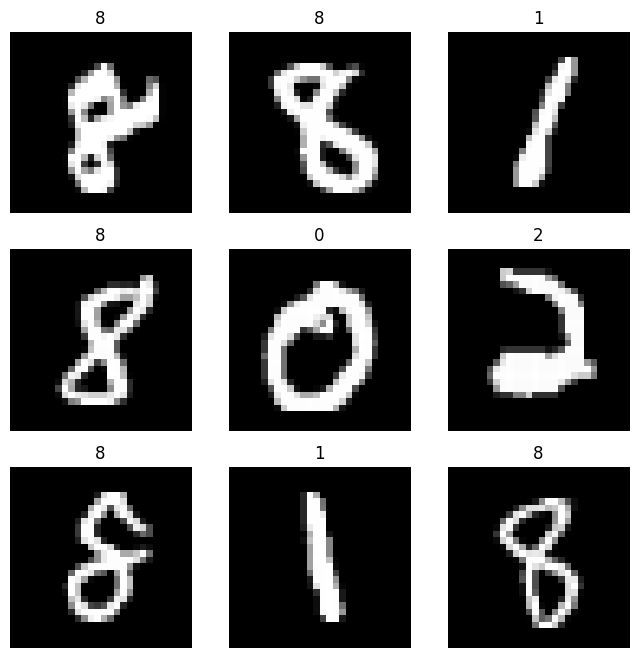

In [5]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define a mapping of labels to digits
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

# Define the transformations for preprocessing the images
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the QMNIST dataset for training
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)

# Create a figure to plot the images
figure = plt.figure(figsize=(8, 8))
columns, rows = 3, 3

# Iterate through the dataset and visualize sample images
for i in range(1, columns * rows + 1):
    sample_index = torch.randint(len(train_dataset), size=(1,)).item()
    image, label = train_dataset[sample_index]
    figure.add_subplot(rows, columns, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")

plt.show()


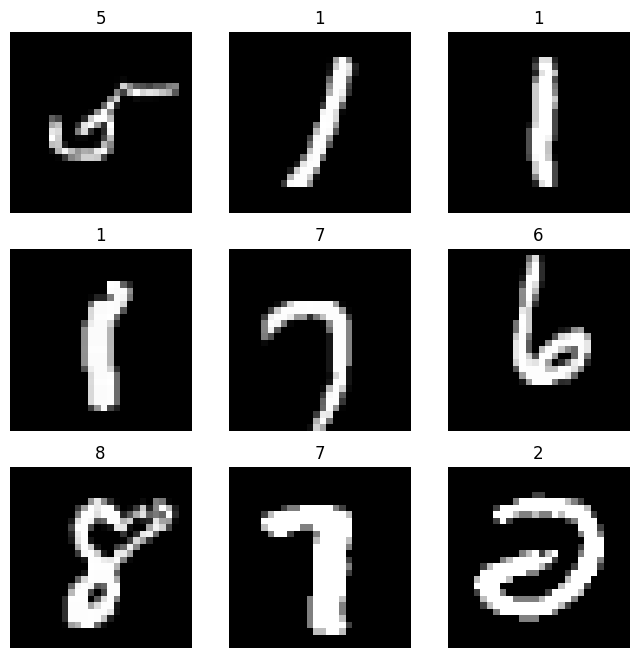

In [6]:
# Create a figure for plotting
plot_figure = plt.figure(figsize=(8, 8))
columns, rows = 3, 3

# Loop over the test dataset to display samples
for i in range(1, columns * rows + 1):
    sample_index = torch.randint(len(test_dataset), size=(1,)).item()
    image, label = test_dataset[sample_index]
    plot_figure.add_subplot(rows, columns, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")

plt.show()


In [10]:
# Define the architecture of the neural network
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network model
neural_network = MLP()


In [12]:
import torch.nn as nn
import torch.optim as optim

# Define your neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize your neural network model
model = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Training Finished')


Epoch 1, Batch 100, Loss: 0.9954199111461639
Epoch 1, Batch 200, Loss: 0.46690152496099474
Epoch 1, Batch 300, Loss: 0.3955640897154808
Epoch 1, Batch 400, Loss: 0.3240852090716362
Epoch 1, Batch 500, Loss: 0.3118569702655077
Epoch 1, Batch 600, Loss: 0.29150551185011864
Epoch 1, Batch 700, Loss: 0.26566119089722634
Epoch 1, Batch 800, Loss: 0.247981249243021
Epoch 1, Batch 900, Loss: 0.2191791483014822
Epoch 2, Batch 100, Loss: 0.20525375973433257
Epoch 2, Batch 200, Loss: 0.21117535047233105
Epoch 2, Batch 300, Loss: 0.19635077696293593
Epoch 2, Batch 400, Loss: 0.17533508818596602
Epoch 2, Batch 500, Loss: 0.17787901792675256
Epoch 2, Batch 600, Loss: 0.1692874513939023
Epoch 2, Batch 700, Loss: 0.1602169058471918
Epoch 2, Batch 800, Loss: 0.1632572408951819
Epoch 2, Batch 900, Loss: 0.1633285466581583
Epoch 3, Batch 100, Loss: 0.1520793471299112
Epoch 3, Batch 200, Loss: 0.13487318513914942
Epoch 3, Batch 300, Loss: 0.14234700987115503
Epoch 3, Batch 400, Loss: 0.1410978115350008
E

In [13]:
# Set the model to evaluation mode
model.eval()

# Initialize variables for tracking correct predictions and total samples
correct = 0
total = 0

# Turn off gradient computation
with torch.no_grad():
    # Iterate through the training dataset
    for data in train_loader:
        images, labels = data
        # Forward pass
        outputs = model(images)
        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)
        # Update the total number of samples
        total += labels.size(0)
        # Update the number of correctly classified samples
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = correct / total * 100
print(f'Accuracy on the training set: {accuracy:.3f}%')


Accuracy on the training set: 98.550%


In [14]:
# Evaluate the model on the test set
model.eval()
correct = 0
total = 0

# Turn off gradient computation
with torch.no_grad():
    # Iterate through the test loader
    for data in test_loader:
        images, labels = data
        # Forward pass
        outputs = model(images)
        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)
        # Update the total number of samples
        total += labels.size(0)
        # Update the number of correctly classified samples
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = correct / total * 100
print(f'Accuracy on the test set: {accuracy:.3f}%')


Accuracy on the test set: 96.983%


In [15]:
# Set the model to evaluation mode
model.eval()

# Initialize an empty list to store predictions
predictions = []

# Initialize variables for tracking correct predictions and total samples
correct = 0
total = 0

# Turn off gradient computation
with torch.no_grad():
    # Iterate through the test loader
    for data in test_loader:
        images, labels = data
        # Forward pass
        outputs = model(images)
        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)
        # Extend the predictions list with the predicted labels
        predictions.extend(predicted.numpy())
        # Update the total number of samples
        total += labels.size(0)
        # Update the number of correctly classified samples
        correct += (predicted == labels).sum().item()


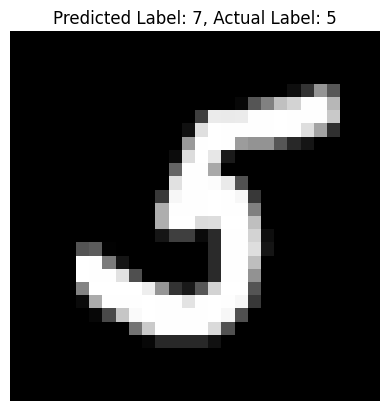

In [16]:
# Get one test image and its label
image, label = images[0], labels[0]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[0]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()


# Step 3
**Report on the results in terms of prediction accuracy on the train and test datasets:**
- Accuracy on training set: 98.55%
- Accuracy on test set: 96.98%

# Step 4
**Chosen Proposed modification:**
-
Raise the current count of nodes in the layer to 256

**Hypothesize how it would change the performance results:**
-
The anticipated outcome is an enhancement in performance. By augmenting the number of units, the model's ability to represent data should improve, thereby enabling it to capture intricate relationships among the input features.

#Step 5
Modify the model based on the chosen method and train



In [21]:
# Define the neural network architecture
class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network model
model = MLP2()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Training Finished')

# Evaluate the model on the train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the test set: {round(correct / total * 100, 3)}%')


Epoch 1, Batch 100, Loss: 0.8142573830485343
Epoch 1, Batch 200, Loss: 0.38304812625050544
Epoch 1, Batch 300, Loss: 0.3443899601697922
Epoch 1, Batch 400, Loss: 0.27329949356615546
Epoch 1, Batch 500, Loss: 0.26016170635819436
Epoch 1, Batch 600, Loss: 0.21697482354938985
Epoch 1, Batch 700, Loss: 0.20977485336363316
Epoch 1, Batch 800, Loss: 0.21022147580981254
Epoch 1, Batch 900, Loss: 0.1896942576393485
Epoch 2, Batch 100, Loss: 0.15109093025326728
Epoch 2, Batch 200, Loss: 0.15907142285257578
Epoch 2, Batch 300, Loss: 0.13978375149890782
Epoch 2, Batch 400, Loss: 0.15137547831982373
Epoch 2, Batch 500, Loss: 0.13757030822336674
Epoch 2, Batch 600, Loss: 0.14106159966439008
Epoch 2, Batch 700, Loss: 0.13918499274179338
Epoch 2, Batch 800, Loss: 0.13019672829657794
Epoch 2, Batch 900, Loss: 0.12200108909979462
Epoch 3, Batch 100, Loss: 0.10237119130790234
Epoch 3, Batch 200, Loss: 0.11227866601198912
Epoch 3, Batch 300, Loss: 0.10925579791888594
Epoch 3, Batch 400, Loss: 0.096676767

# Step 6
**Report on the results of the modified model and if it matches your hypothesis:**
- Accuracy on training set: 98.925%
- Accuracy on test set: 97.423%

The test accuracy demonstrates a slight improvement in this modified model, primarily attributed to the augmentation in the number of units within the hidden layers.

#Step 7

I iteratively tested different optimizers, loss functions, dropout rates, and activation functions, monitoring their impact on performance. Each experiment informed subsequent adjustments to hyperparameters, allowing for a refined optimization process.

## Experiment 1
- Using LeakyRELU as the activation function

In [23]:
# Define the neural network architecture
class MLP3(nn.Module):
    def __init__(self):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        activation = nn.LeakyReLU(0.1)
        x = activation(self.fc1(x))
        x = activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network model
model = MLP3()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Training Finished')

# Evaluate the model on the train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the test set: {round(correct / total * 100, 3)}%')


Epoch 1, Batch 100, Loss: 0.7687590178847313
Epoch 1, Batch 200, Loss: 0.3944550859183073
Epoch 1, Batch 300, Loss: 0.3148936751484871
Epoch 1, Batch 400, Loss: 0.265697428137064
Epoch 1, Batch 500, Loss: 0.25926123015582564
Epoch 1, Batch 600, Loss: 0.22099491845816374
Epoch 1, Batch 700, Loss: 0.21797717727720736
Epoch 1, Batch 800, Loss: 0.19821106042712927
Epoch 1, Batch 900, Loss: 0.17908367140218615
Epoch 2, Batch 100, Loss: 0.1681343640573323
Epoch 2, Batch 200, Loss: 0.14369015593081713
Epoch 2, Batch 300, Loss: 0.15844985714182258
Epoch 2, Batch 400, Loss: 0.1300379884429276
Epoch 2, Batch 500, Loss: 0.13224038464948534
Epoch 2, Batch 600, Loss: 0.12853086613118647
Epoch 2, Batch 700, Loss: 0.146430259142071
Epoch 2, Batch 800, Loss: 0.12741989800706505
Epoch 2, Batch 900, Loss: 0.135161196552217
Epoch 3, Batch 100, Loss: 0.10713835161179304
Epoch 3, Batch 200, Loss: 0.10211492996662855
Epoch 3, Batch 300, Loss: 0.11240353694185615
Epoch 3, Batch 400, Loss: 0.11758188631385565

**Experiment 1, Observation: There is a minimal change in model performance.**

## Experiment 2
- Adding dropout
- Using RELU as activation function

In [26]:
# Define the neural network architecture
class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the neural network model
model = MLP4()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Training Finished')

# Evaluate the model on the train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the test set: {round(correct / total * 100, 3)}%')


Epoch 1, Batch 100, Loss: 1.094520983695984
Epoch 1, Batch 200, Loss: 0.5558154931664467
Epoch 1, Batch 300, Loss: 0.4753473436832428
Epoch 1, Batch 400, Loss: 0.41381761148571966
Epoch 1, Batch 500, Loss: 0.40914664216339586
Epoch 1, Batch 600, Loss: 0.3486849971115589
Epoch 1, Batch 700, Loss: 0.356544294282794
Epoch 1, Batch 800, Loss: 0.325548752695322
Epoch 1, Batch 900, Loss: 0.3339158549904823
Epoch 2, Batch 100, Loss: 0.29641877360641955
Epoch 2, Batch 200, Loss: 0.29483731277287006
Epoch 2, Batch 300, Loss: 0.2881804385781288
Epoch 2, Batch 400, Loss: 0.27488680273294447
Epoch 2, Batch 500, Loss: 0.29092188000679015
Epoch 2, Batch 600, Loss: 0.28439061254262926
Epoch 2, Batch 700, Loss: 0.2682033259794116
Epoch 2, Batch 800, Loss: 0.24329226296395062
Epoch 2, Batch 900, Loss: 0.2577632188051939
Epoch 3, Batch 100, Loss: 0.23342990174889564
Epoch 3, Batch 200, Loss: 0.24786084610968828
Epoch 3, Batch 300, Loss: 0.2475956492498517
Epoch 3, Batch 400, Loss: 0.21764727402478456
Ep


Experiment 2, Observation: The alteration in model performance remains minimal, mirroring the outcomes observed in experiment 1.

## Experiment 2
- Optimizer : SGD with Momentum
- Remove Dropout
- Keep Loss Function as it is. (CrossEntropyLoss is a good loss function for image classification tasks)
- Change epochs to 10

In [28]:
# Define the neural network architecture
class MLP5(nn.Module):
    def __init__(self):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network model
model = MLP5()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Training Finished')

# Evaluate the model on the train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on the test set: {round(correct / total * 100, 3)}%')


Epoch 1, Batch 100, Loss: 2.2344424057006838
Epoch 1, Batch 200, Loss: 1.96050039768219
Epoch 1, Batch 300, Loss: 1.4477262008190155
Epoch 1, Batch 400, Loss: 0.9816925448179245
Epoch 1, Batch 500, Loss: 0.7374842995405197
Epoch 1, Batch 600, Loss: 0.6112575918436051
Epoch 1, Batch 700, Loss: 0.533815955221653
Epoch 1, Batch 800, Loss: 0.49921472132205963
Epoch 1, Batch 900, Loss: 0.4432837899029255
Epoch 2, Batch 100, Loss: 0.41800090461969375
Epoch 2, Batch 200, Loss: 0.41832919970154764
Epoch 2, Batch 300, Loss: 0.39498530834913254
Epoch 2, Batch 400, Loss: 0.3740631528198719
Epoch 2, Batch 500, Loss: 0.35637629121541975
Epoch 2, Batch 600, Loss: 0.35862250469624996
Epoch 2, Batch 700, Loss: 0.34630589321255684
Epoch 2, Batch 800, Loss: 0.3434796267747879
Epoch 2, Batch 900, Loss: 0.3426695528626442
Epoch 3, Batch 100, Loss: 0.3273366059362888
Epoch 3, Batch 200, Loss: 0.322786949723959
Epoch 3, Batch 300, Loss: 0.32061602890491486
Epoch 3, Batch 400, Loss: 0.3287878656387329
Epoch 


Experiment 3, Observation: The observed model performance is inferior, as indicated above, underscoring the superiority of Adam over SGD with momentum in terms of efficacy.